In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint, ode

plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
pd.set_option('display.max_columns', 50)
%config IPCompleter.greedy=True

In [2]:
SRESOLUTION = 100


        
def trajectory(beta, y_final):
    def get_end_point( F0, alfa0, beta):
        """Integrates based on given initial conditions and beta.
        Returns array Faxy."""
        initial = [F0, alfa0, 0, 0]
        def odes(s, arej, beta):
            F, alfa, x, y = arej
            Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
            alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
            xpika = np.cos(alfa)
            ypika = np.sin(alfa)
            return [Fpika, alfapika, xpika, ypika]
        r = ode(odes).set_integrator('dopri5')
        r.set_initial_value(initial, 0).set_f_params(beta)
        return r.integrate(1)
    def get_trajectory(F0, alfa0, beta):
        """Integrates based on given initial conditions and beta.
        Returns trajectory Faxy."""
        initial = [F0, alfa0, 0, 0]
        def odes(s, arej, beta):
            F, alfa, x, y = arej
            Fpika = - beta*x*np.cos(alfa) + np.sin(alfa)
            alfapika = (beta*x*np.sin(alfa) + np.cos(alfa))/F
            xpika = np.cos(alfa)
            ypika = np.sin(alfa)
            return [Fpika, alfapika, xpika, ypika]
        r = ode(odes).set_integrator('dopri5')
        r.set_initial_value(initial, 0).set_f_params(beta)
        ss = np.linspace(0,1, 200)
        sol = np.zeros((ss.shape[0],4))
        for i, t in enumerate(ss):
            sol[i,:] = r.integrate(t)
        return sol
    def shoot(beta, y_final):
        """For a given beta and y_final finds initial conditions
        of F0 and alfa0 and promplty returns them, if found, else None."""
        def _fun_to_minimize(arej, beta, y_final):
            F0, alfa0 = arej
            xy = get_end_point(F0, alfa0, beta)[-2:]
            xf, yf = xy[0], xy[1]
            return [xf, yf-y_final]
        from scipy.optimize import root
        for bleh in range(100):
            rez = root(_fun_to_minimize, [np.random.rand(), np.random.rand()*np.pi*2], args=(beta, y_final))
            if rez.success:
                #print(f"Initial guesses converged after {bleh+1} tries.")
                return rez.x
    
    params = shoot(beta, y_final)
    trajektorija = get_trajectory(params[0], params[1], beta)
    return params, trajektorija
    
    
    
beta = 10
y_final = -0.8

[F0, alfa], trajektorija = trajectory(beta, y_final)

//home/peter/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


## Pomožne funkcije za opis trajektorije:

In [3]:
def get_shape(trajektorija):
    """Calculates number of times the shape crosses x=0 line.
    Inspired by https://stackoverflow.com/questions/2652368/how-to-detect-a-sign-change-for-elements-in-a-numpy-array"""
    x = trajektorija[:,2]
    asign = np.sign(x)
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    return np.sum(signchange)
def get_y_min(trajektorija):
    return np.min(trajektorija[:,3])
def get_x_max(trajektorija):
    abs_x = np.abs(trajektorija[:,2])
    return np.max(abs_x)

### Loop za $y_{final}$ in $\beta$:

In [77]:
M = 100
yfs = np.linspace(-1, -.1, M)
betas = np.logspace(-1, 2, M)
rezults = np.empty((M**2, 5))
i = 0
for yf in yfs:
    for beta in betas:
        [F0, alfa], trajektorija = trajectory(beta, yf)
        rezults[i,:] = yf, beta, get_shape(trajektorija), get_y_min(trajektorija), get_x_max(trajektorija)
        i += 1
        if i%1000==0:
            print(f"{i*100/M**2:0.02}%", end="   ")
np.savetxt(f"2020-rezults{M}.txt", rezults)

1.0%   2.0%   3.0%   4.0%   5.0%   6.0%   7.0%   8.0%   9.0%   1e+01%   1.1e+01%   1.2e+01%   1.3e+01%   1.4e+01%   1.5e+01%   1.6e+01%   1.7e+01%   1.8e+01%   1.9e+01%   2e+01%   2.1e+01%   2.2e+01%   2.3e+01%   2.4e+01%   2.5e+01%   2.6e+01%   2.7e+01%   2.8e+01%   2.9e+01%   3e+01%   3.1e+01%   3.2e+01%   3.3e+01%   3.4e+01%   3.5e+01%   3.6e+01%   3.7e+01%   3.8e+01%   3.9e+01%   4e+01%   4.1e+01%   4.2e+01%   4.3e+01%   4.4e+01%   4.5e+01%   4.6e+01%   4.7e+01%   4.8e+01%   4.9e+01%   5e+01%   5.1e+01%   5.2e+01%   5.3e+01%   5.4e+01%   5.5e+01%   5.6e+01%   5.7e+01%   5.8e+01%   5.9e+01%   6e+01%   6.1e+01%   6.2e+01%   6.3e+01%   6.4e+01%   6.5e+01%   6.6e+01%   6.7e+01%   6.8e+01%   6.9e+01%   7e+01%   7.1e+01%   7.2e+01%   7.3e+01%   7.4e+01%   7.5e+01%   7.6e+01%   7.7e+01%   7.8e+01%   7.9e+01%   8e+01%   8.1e+01%   8.2e+01%   8.3e+01%   8.4e+01%   8.5e+01%   8.6e+01%   8.7e+01%   8.8e+01%   8.9e+01%   9e+01%   9.1e+01%   9.2e+01%   9.3e+01%   9.4e+01%   9.5e+01%   9.6e+01% 

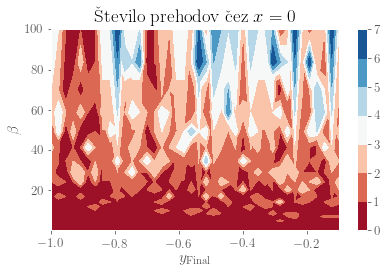

In [35]:
from scipy.interpolate import griddata
x,y,z = rezults[:,0],rezults[:,1],rezults[:,2] 

yy, xx = np.meshgrid(y,x)
zz = griddata((x,y),z,(xx,yy))

plt.contourf(xx,yy,zz-2, cmap='RdBu') # if you want contour plot
#plt.imshow(zz)
plt.colorbar()
plt.title(r"Število prehodov čez $x=0$")
plt.xlabel(r"$y_{\mathrm{ Final}}$")
plt.ylabel(r"$\beta$")

plt.savefig("2020-1-fazniportret_prehodi3.pdf")
plt.show()

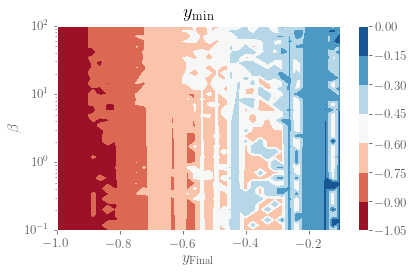

In [31]:
from scipy.interpolate import griddata
x,y,z = rezults[:,0],rezults[:,1],rezults[:,3] 

yy, xx = np.meshgrid(y,x)
zz = griddata((x,y),z,(xx,yy))

plt.contourf(xx,yy,zz, cmap='RdBu') # if you want contour plot
#plt.imshow(zz)
plt.colorbar()
plt.title(r"$y_{\mathrm{ min}}$")
plt.xlabel(r"$y_{\mathrm{ Final}}$")
plt.ylabel(r"$\beta$")


plt.savefig("2020-1-fazniportret_ymin3.pdf")
plt.show()

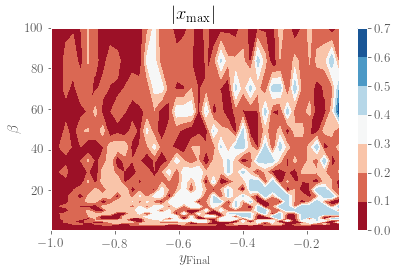

In [36]:
from scipy.interpolate import griddata
x,y,z = rezults[:,0],rezults[:,1],rezults[:,4] 

yy, xx = np.meshgrid(y,x)
zz = griddata((x,y),z,(xx,yy))

plt.contourf(xx,yy,zz, cmap='RdBu') # if you want contour plot
#plt.imshow(zz)
plt.colorbar()
plt.title(r"$\left|x_{\mathrm{ max}}\right|$")
plt.xlabel(r"$y_{\mathrm{ Final}}$")
plt.ylabel(r"$\beta$")

plt.savefig("2020-1-fazniportret_xmax3.pdf")
plt.show()

In [4]:
rezults = np.loadtxt("2020-rezults100.txt")
rezults[:2,:]

array([[-1.00000000e+00,  1.00000000e-01,  2.00000000e+00,
        -1.00000000e+00,  2.62527988e-13],
       [-1.00000000e+00,  1.07226722e-01,  2.00000000e+00,
        -1.00000000e+00,  2.82534752e-15]])

In [5]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,2]
colormap = plt.get_cmap("plasma")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data 
ax.scatter(x,y,z, c=colormap(norm(data)))
ax.set_title("Oblika - spremembe predznaka")
ax.set_xlabel(r"$y_{\mathrm{ Final}}$")
ax.set_ylabel(r"$\beta$")
plt.show()

In [7]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,3]
colormap = plt.get_cmap("viridis")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data 
ax.scatter(x,y,z, c=colormap(norm(data)))
ax.set_title(r"$y_{\mathrm{min}}$")
ax.set_xlabel(r"$y_{\mathrm{ Final}}$")
ax.set_ylabel(r"$\beta$")

plt.show()

In [17]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.ticker as mticker
def log_tick_formatter(val, pos=None):
    return "{:0.2f}".format(10**val)
import matplotlib.colors
data = rezults[:,4]
colormap = plt.get_cmap("plasma")
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
x,y,z = rezults[:,0],np.log10(rezults[:,1]),data 
ax.scatter(x,y,z, c=colormap(norm(data)))
ax.set_title(r"$x_{\mathrm{max}}$")
ax.set_xlabel(r"$y_{\mathrm{ Final}}$")
ax.set_ylabel(r"$\beta$")

plt.show()

# Druga naloga

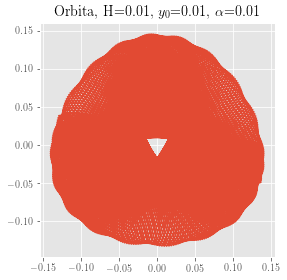

In [62]:
%matplotlib inline
def U(x,y):
    return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3

def get_trajectory(H, y0, alpha, num_points=400, max_time=50):
    """Integrates based on given initial full energy, 
    direction alpha and vertical position y0."""
    x0 = 0
    speed = np.sqrt(2*(H-U(x0,y0)))
    u0 = speed*np.cos(alpha)
    v0 = speed*np.sin(alpha)
    initial = [x0, y0, u0, v0]
    def odes(t, arej):
        x,y,u,v = arej
        xpika = u
        ypika = v
        upika = - x -2*x*y
        vpika = -y-x**2+y**2
        return [xpika,ypika,upika,vpika]
    r = ode(odes).set_integrator('dopri5')
    r.set_initial_value(initial, 0)
    ss = np.linspace(0,max_time, num_points)
    sol = np.empty((ss.shape[0],4))
    for i, t in enumerate(ss):
        sol[i,:] = r.integrate(t)
    from collections import namedtuple
    rezultat = namedtuple("Rezultat", ["x","y","u","v","param_dict"])
    return rezultat(sol[:,0],sol[:,1],sol[:,2],sol[:,3], {"y0":y0, "H":H, "alpha":alpha})

rez = get_trajectory(0.01, 0.01, 0.01, max_time=900, num_points=2000)
plt.plot(rez.x, rez.y)
plt.title(fr"""Orbita, H={{{rez.param_dict['H']}}}, $y_0$={{{rez.param_dict['y0']}}}, $\alpha$={{{rez.param_dict['alpha']}}} """)
plt.axes().set_aspect('equal')
plt.savefig("2020-2-trajektorija3.pdf")
plt.show()

In [58]:
class Trajektorija:
    def __init__(self, H, y0, alpha, num_points=400, max_time=50, min_time=0):
        self.H = H
        self.y0 = y0
        self.alpha = alpha
        self.tranatu = None
        self.num_points   =num_points
        self.max_time   =max_time
        self.min_time   =min_time
    @staticmethod
    def U(x,y):
        return 0.5*x**2+0.5*(y**2)+(x**2)*y-(y**3)/3
    def get_trajectory(self,):
        """Integrates based on given initial full energy, 
        direction alpha and vertical position y0."""
        x0 = 0
        speed = np.sqrt(2*(self.H-Trajektorija.U(x0,self.y0)))
        u0 = speed*np.cos(self.alpha)
        v0 = speed*np.sin(self.alpha)
        initial = [x0, self.y0, u0, v0]
        def odes(t, arej):
            x,y,u,v = arej
            xpika = u
            ypika = v
            upika = - x -2*x*y
            vpika = -y-x**2+y**2
            return [xpika,ypika,upika,vpika]
        r = ode(odes).set_integrator('dopri5')
        r.set_initial_value(initial, 0)
        ss = np.linspace(self.min_time,self.max_time, self.num_points)
        sol = np.empty((ss.shape[0],4))
        rezs = []
        for i, t in enumerate(ss):
            sol[i,:] = r.integrate(t)
            if i==0: 
                continue
            if (sol[i-1,0] < 0) and (sol[i,0] >= 0):
                    alpha = abs(sol[i-1,0])/(ss[i]-ss[i-1])
                    rezs.append(
                    [alpha*sol[i-1,1]+(1-alpha)*sol[i,1], alpha*sol[i-1, 3]+(1-alpha)*sol[i, 3]])
        from collections import namedtuple
        rezultat = namedtuple("Rezultat", ["x","y","u","v","t","param_dict"])
        self.tranatu = rezultat(sol[:,0],sol[:,1],sol[:,2],sol[:,3], ss, {"y0":self.y0, "H":self.H, "alpha":self.alpha})
        if len(rezs)!=0:
            rezs = np.array(rezs)
            self.poincare = namedtuple("poincs", ["y","v"])(rezs[:,0], rezs[:,1])
        else:
            self.poincare = namedtuple("poincs", ["y","v"])([], [])

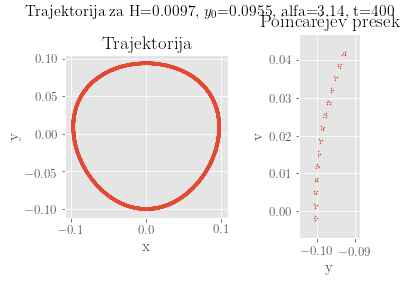

In [59]:

prva = Trajektorija(0.0097, 0.0955, 3.142, max_time=400, num_points=1000)
prva.get_trajectory()
#prva.get_trajectory()
fig, [ax1, ax2] = plt.subplots(ncols=2)
plt.suptitle(fr"Trajektorija za H={{{prva.H}}}, $y_0$={{{prva.y0}}}, alfa={{{prva.alpha:0.3}}}, t={{{prva.max_time}}}")
ax1.set_title("Trajektorija")
ax1.plot(prva.tranatu.x, prva.tranatu.y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")
ax2.set_title("Poincaréjev presek")
ax2.scatter(prva.poincare.y, prva.poincare.v,s=1)
ax2.set_xlabel("y")
ax2.set_ylabel("v")
ax2.set_aspect("equal")

plt.show()

In [60]:
def funkc(arej):
    H,y0, alfa = arej
    p = Trajektorija(H, y0, alfa, max_time=200, num_points=1000)
    p.get_trajectory()
    return np.std(p.poincare.y)+np.std(p.poincare.v)
from scipy.optimize import minimize
res = minimize(funkc, x0=[0.001, 0.096, 3.142])

//home/peter/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
//home/peter/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
//home/peter/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
//home/peter/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [63]:
rez.x

array([0.00853924, 0.0892925 , 3.14      ])

//home/peter/anaconda3/lib/python3.7/site-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


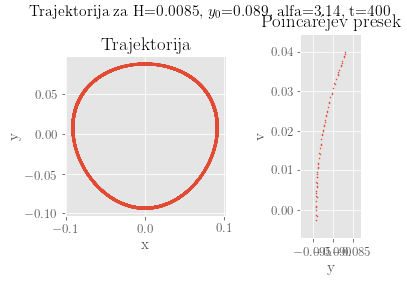

In [65]:
prva = Trajektorija(*rez.x, max_time=400, num_points=1000)
prva.get_trajectory()
#prva.get_trajectory()
fig, [ax1, ax2] = plt.subplots(ncols=2)
plt.suptitle(fr"Trajektorija za H={{{prva.H:0.2}}}, $y_0$={{{prva.y0:0.2}}}, alfa={{{prva.alpha:0.3}}}, t={{{prva.max_time}}}")
ax1.set_title("Trajektorija")
ax1.plot(prva.tranatu.x, prva.tranatu.y)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_aspect("equal")
ax2.set_title("Poincaréjev presek")
ax2.scatter(prva.poincare.y, prva.poincare.v,s=1)
ax2.set_xlabel("y")
ax2.set_ylabel("v")
ax2.set_aspect("equal")

plt.show()